# CS345 Final Project
## Mark Richards and Glen McIntosh

In [6]:
#test
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype
import numpy as np
le = LabelEncoder()


data = pd.read_csv('dataset.csv', index_col=0)
for col in data.columns:
    if(not is_numeric_dtype(data[col])):
        data[col] = le.fit_transform(data[col])
X = data.loc[:, data.columns != 'popularity'].values

y = data['popularity'].values
X.shape, y.shape
print(X[1])
print(y[1])
size_test = 0.2
size_validation = 0.2
size_train = 0.6

from sklearn.model_selection import train_test_split

# first split into training / test, where the training set
# will be further split into training / validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=size_test, random_state=5)


[55668 3287 14796 22528 149610 False 0.42 0.166 1 -17.235 1 0.0763 0.924
 5.56e-06 0.101 0.267 77.489 4 0]
55


Random Forest

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error 
import math
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("Mean squared error: ", round(mse, 3))
print("Root mean squared error: ", round(rmse, 3))

Mean squared error:  578.169
Root mean squared error:  24.045


PCA

Linear Regression: Mean Squared Error = 496.8894703368323
Linear Regression: Root mean Squared Error = 22.291017705273852
Random Forest: Mean Squared Error = 324.2128106980953
Random Forest: Root mean Squared Error = 18.005910437911638
Gradient Boosting: Mean Squared Error = 483.40008022706564
Gradient Boosting: Root mean Squared Error = 21.986361232069886
SVR: Mean Squared Error = 494.4564769690332
SVR: Root mean Squared Error = 22.23637733465218
KNN: Mean Squared Error = 510.0547596491228
KNN: Root mean Squared Error = 22.584391947739544
MLP: Mean Squared Error = 3998.4066558368013
MLP: Root mean Squared Error = 63.23295545707793


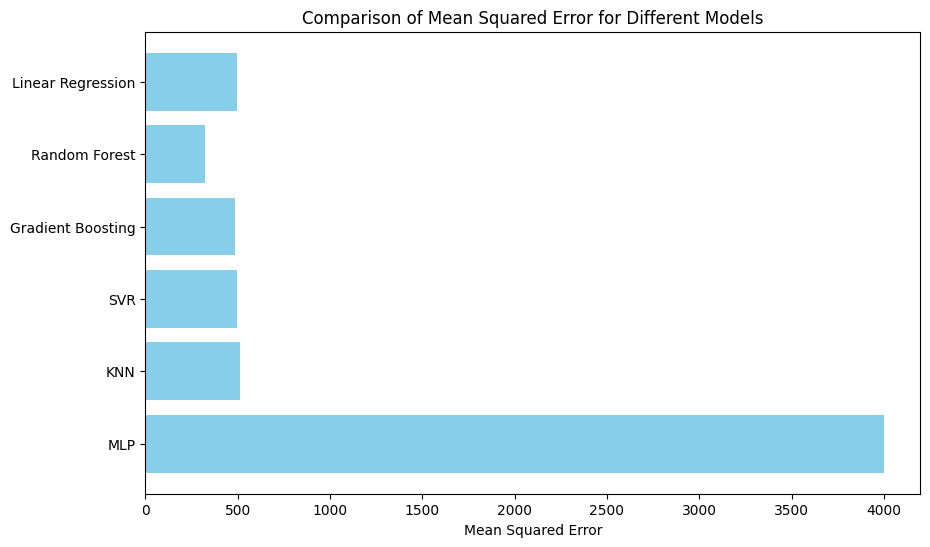

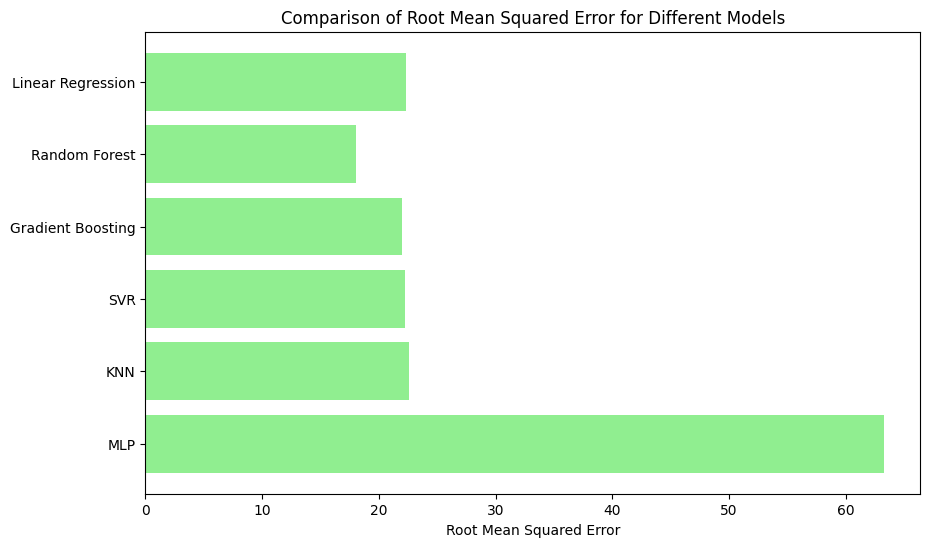

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import math

pca = PCA(n_components=3)

pca.fit(X_train)

principal_components = pca.components_
#print(principal_components)

X_train_pca = pca.transform(X_train)

X_test_pca = pca.transform(X_test)

mse_scores = []
rmse_scores = []

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP": MLPRegressor()
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    print(f"{name}: Mean Squared Error = {mse}")
    print(f"{name}: Root mean Squared Error = {rmse}")

# Plotting
plt.figure(figsize=(10, 6))

plt.barh(list(models.keys()), mse_scores, color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different Models')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()

plt.figure(figsize=(10, 6))

plt.barh(list(models.keys()), rmse_scores, color='lightgreen')
plt.xlabel('Root Mean Squared Error')
plt.title('Comparison of Root Mean Squared Error for Different Models')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()

Correlation Matrix

In [ ]:
data.corr()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
track_id,1.000000,0.003145,0.007099,0.005522,0.003243,-0.002948,0.004163,-0.000227,-0.000496,-0.003049,0.001659,-0.006385,-0.000463,0.001339,-0.000122,-0.003250,0.001762,-0.008136,-0.003744,-0.003892
artists,0.003145,1.000000,0.090200,0.038962,0.003613,-0.021607,-0.004681,-0.009931,-0.005585,0.006627,-0.018849,-0.002994,-0.016232,-0.004201,0.016062,-0.007998,0.001034,0.001176,-0.008205,-0.008684
album_name,0.007099,0.090200,1.000000,0.303326,0.042476,0.006659,0.000366,-0.019172,-0.044734,-0.006879,-0.032245,-0.000470,-0.013400,0.033436,0.001293,-0.027725,-0.041685,-0.003281,-0.001222,0.003509
track_name,0.005522,0.038962,0.303326,1.000000,0.011911,0.004122,-0.005851,-0.020873,-0.039645,-0.003901,-0.012528,0.006074,-0.025669,0.035894,-0.024628,-0.005687,-0.016535,0.005590,-0.002533,0.001864
popularity,0.003243,0.003613,0.042476,0.011911,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073,0.032692
duration_ms,-0.002948,-0.021607,0.006659,0.004122,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225,-0.032826
explicit,0.004163,-0.004681,0.000366,-0.005851,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386,-0.054828
danceability,-0.000227,-0.009931,-0.019172,-0.020873,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218,0.003569
energy,-0.000496,-0.005585,-0.044734,-0.039645,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126,-0.056175
key,-0.003049,0.006627,-0.006879,-0.003901,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065,-0.005508


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm

from sklearn.model_selection import GridSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=size_validation, random_state=5)

param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [0.001, 0.01, 0.1], 
   'kernel': ['rbf']},
 ]
classifier = GridSearchCV(svm.SVC(), param_grid)

classifier.fit(X_valid, y_valid);
classifier.best_estimator_

/home/glen/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


SVC(C=10, gamma=0.001)